<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday March 2**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**: Chandler de Spirlet

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---


In [22]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>



### [30 points] Problem 1: Gambling With A Peg Legged Pirate:

You're a time traveling data scientist, and have traveled way back to the year 1654. Immediately upon arriving you're picked up by a bunch of pirates, and made to join a pirate crew. When the pirates realize that you're immensely knowledgable about probabilities and statistics, they promote you to be their captain! You rename the ship to be the "Certain Probability of Death", and set out upon the high seas. After a few days of sailing you come upon another band of buccaneers in their ship. Their captain, Peg Leg Pascal Fermat, challanges you to a gambling game, but you're not sure if you should play it. The rules for the game are below:

* You and Peg Leg Pascal Fermat will take turns repeatedly rolling a 20 sided die. The die has values 1 - 20 on it.


* **On your turn, the rules are as follows:**
1. If you roll the same value as what Peg Leg Pascal Fermat rolled on his last turn, you have to give him 5 dubloons. Do not perform any additional actions from the below list of rules if you rolled the same value as what Peg Leg Pascal Fermat rolled on his last turn. Otherwise:
2. If you roll an 8, Peg Leg Pascal Fermat will give you two gold dubloons.
3. If you roll a 7, Peg Leg Pascal Fermat will give you four gold dubloon.
4. If you roll a 15, you have to give Peg Leg Pascal Fermat one dubloon. 
5. If you roll a 1, the game ends.
6. If you roll any other value, nothing happens. 


* **On Peg Leg Pascal Fermat's turn the rules are as follows:**
1. If Peg Leg Pascal Fermat rolls the same number as you did on your last turn, he then rolls a different 19 sided die. When he rolls again, if he rolls a 19, **you must pay him** 100 dubloons. If he rolls anything other than a 19, **he must pay you** the same number of dubloons as the value of the roll. E.g. If he rolls a 10, he gives you 10 dubloons, but if he rolls a 19 you give him 100 dubloons. When he rolls again, he does not perform any other rules from the below list.
2. If Peg Leg Pascal Fermat rolls a 2, he must give you one gold dubloon.
3. If Peg Leg Pascal Fermat rolls a 14, you must give him two dubloons.
4. If Peg leg Pascal Fermat rolls a 17, you must give him three dubloons.
5. If Peg Leg Pascal Fermat rolls a 1, the game ends.

6. If Peg Leg Pascal Fermat rolls a 3, he takes off his peg leg, and gives you the leg. Who knows... Maybe it will be usefull if you lose your leg? 
7. If Peg Leg Pascal Fermat rolls a 3 and he has already given you his peg leg, he must give you 3 dubloons. 
8. If he rolls any other values, nothing happens.
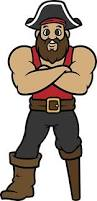

**Part A:** Without doing any extensive math or simulations, predict whether this game will result in your making or loosing money. Would you play it? Any logical non-empty answer will get credit here, so don't worry about if your prediction is actually right.

I would play this game because, in most instances, either no dubloons are being transferred or I am being paid. There is the instance of oweing 100 dubloons, but that has a smaller probability.

**Part B:** Luckily, when you time traveled back to 1654, you brought your laptop with you! Use Python to simulate 10,000 games following the above rules. Record your winnings or losings for each game in an array. Record the games in which you lost money with a negative value (amount you lost), and games in which you won money with a positive value (amount you won). Assume you always go first. You may write multiple functions or use multiple jupyter notebook cells to write your code, how you structure it is up to you. You may use any Numpy or Pandas functions you find useful, but may not import any additional libraries. Calculate the median amount you win or lose, and report it in markdown below. Based on the median value, would you play the game?

In [2]:
die_20 = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
die_19 = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

def my_turn(his_roll):
    my_roll = np.random.choice(die_20)
    my_money = 0
    if (my_roll == his_roll):
        my_money -= 5
        return my_money, my_roll
    if (my_roll == 8 ):
        my_money += 2
        return my_money, my_roll
    if (my_roll == 7):
        my_money += 4
        return my_money, my_roll
    if (my_roll == 15):
        my_money -= 1
        return my_money, my_roll
    if (my_roll == 1):
        return my_money, my_roll
    else:
        return my_money, my_roll

def peg_leg(my_roll, has_leg):
    his_roll = np.random.choice(die_20)
    my_money = 0
    if (his_roll == my_roll):
        his_roll = np.random.choice(die_19)
        if (his_roll == 19):
            my_money -= 100
        else:
            my_money += his_roll
        return my_money, his_roll, has_leg
    if (his_roll == 2):
        my_money += 1
        return my_money, his_roll, has_leg
    if (his_roll == 14):
        my_money -= 2
        return my_money, his_roll, has_leg
    if (his_roll == 17):
        my_money -= 3
        return my_money, his_roll, has_leg
    if (his_roll == 1):
        return my_money, his_roll, has_leg
    if (his_roll == 3):
        if (has_leg == True):
            has_leg = False
        else:
            my_money += 3
        return my_money, his_roll, has_leg
    else:
        return my_money, his_roll, has_leg

def play_games():
    my_money_list = np.zeros(shape=(10000))
    for x in range(0, 10000):
        his_roll = 0
        my_roll = 0
        my_money = 0
        has_leg = True
        while((his_roll != 1) or (my_roll != 1)):
            init_my_money, my_roll = my_turn(his_roll)
            my_money += init_my_money
            init_my_money, his_roll, has_leg = peg_leg(my_roll, has_leg)
            my_money += init_my_money
        my_money_list[x] = my_money
    return(my_money_list)
tot_game_money = play_games()
print("The median of 10,000 games is {}".format(np.median(tot_game_money)))

The median of 10,000 games is 641.0


Based on the Median value, I would play this game. (The median value, upon different simulations, has been positive and ranging from 500 to 1000. I have the above simulation print the median of 10,000 games).

**Part C:** Calculate a Tukey 5 Number Summary and the mean value for your array of simulated winnings/losings. Based on this information would you play the game? Are any of these metrics more useful than others? Which metrics would be important if we were deciding to play a single game? Which would be more important if we were deciding to play a very large number of games? 

In [16]:
minval = min(tot_game_money)
maxval = max(tot_game_money)
Q1 = np.quantile(tot_game_money, 0.25)
Q2 = np.quantile(tot_game_money, 0.5)
Q3 = np.quantile(tot_game_money, 0.75)
mean_val = np.mean(tot_game_money)
print("5-Number Summary: {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}".format(minval, Q1, Q2, Q3, maxval))
print("The mean value is: {}".format(mean_val))

5-Number Summary: -1173.00, 194.00, 641.00, 1378.00, 8378.00
The mean value is: 951.797


I would play the game considering that the Q1 value is positive. This would inidicate a high change of making money.

**Part D:** After seeing the numbers in **Part C**, we decide to play a few games with Peg Leg Pascal Fermat (You might want to double check you simulation in **Part B** if the mean value doesn't come out slightly positive in **Part C**). You play 10 rounds and it seems like he might be cheating. You just can't win, and you're losing a ton of money! Maybe Peg Leg Pascal Fermat has a loaded die. However, you've found a .csv file buried in the sand. It has the winnings and losings of another player who was playing the same game against Peg Leg Pascal Fermat. We'll use this information to figure out if he is cheating. Read in the file`Pascal_Fermat_Games.csv`. Each row contains the results of a game that another player played against Peg Leg Pascal Fermat. It's a little bit dirty (after all this .csv was buried in the sand). Perform the following cleaning tasks:
1. Read in the .csv. If you have any trouble reading in the file, open it in a text editor and take a look at it. You might find the pandas documentation for the `read_csv` function and some of the optional arguments useful. 
2. Look at the two columns. One of them is useless. Drop the useless one.
3. Drop any strings of non-integer data.
3. Check to see if any of our values are floating point values. If there are any, drop them. 
5. Drop any values that are over 1000 or under -1000. 
6. Print the number of rows remaining.

After doing all that, you should have 9661 rows of data left.

In [4]:
file_path = 'Pascal_Fermat_Games.csv'
df = pd.read_csv(file_path, sep=";")
df.head()
df['Winnings'] = df['Winnings'].str.replace(r'[A-z!@#$%^&*()]', '', regex=True)
df['Winnings'] = df['Winnings'].str.replace(r'[-]?[0-9]*[.][0-9]*', '', regex=True)
df['Winnings'].replace('', np.nan, inplace=True)
df['Winnings'].replace(' ', np.nan, inplace=True)
df.dropna(subset=['Winnings'], inplace=True)
df['Winnings'] = df['Winnings'].astype(int)
df.drop(df.loc[df['Winnings'] > 1000].index, inplace=True)
df.drop(df.loc[df['Winnings'] < -1000].index, inplace=True)
print("The total row count for 'Winnings' is {}".format(df['Winnings'].count()))

The total row count for 'Winnings' is 9661


**Part E:** Create a density histogram with both our siumulated data and our data from the `Pascal_Fermat_Games.csv` file overlayed on the same set of axes. Ensure your plot is legible and contains all of the common labels/titles/etc. Make sure you use enough bins to make the data easly visible. To make the graph easy to read, it's fine to limit the x range to avoid showing large areas with very few occurances of data. This problem will largely be graded based on how nice and easy to interpret your plot is, so do your best.

One Annoying thing about matplotlib is how small the font on the titles/axis labels/etc. Do some googling and figure out how to change the matplotlib font sizes. ***CITE YOUR SOURCES IF YOU USE ANYTHING OTHER THAN THE MATPLOTLIB DOCUMENTATION PAGES.***. Change the axes label font to be 14pt, the x-tick and y-tick font to be 8pt, the title font to be 16pt, and the legend font to be 12pt. Isn't that nicer? 

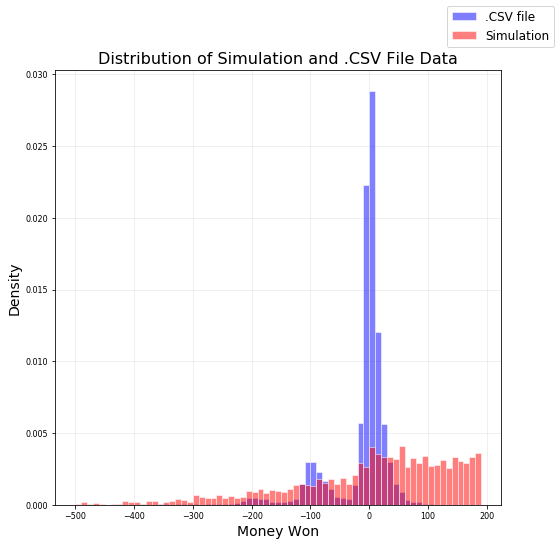

In [5]:
# Initialize figure subplots
dfSim = pd.DataFrame(tot_game_money,columns=['SimWinnings'])
dfSim['SimWinnings'] = dfSim['SimWinnings'].astype(int)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
my_bins = range(-500,200,10)
df.hist(column="Winnings", ax=axes, facecolor="blue", edgecolor="white", density=True, bins=my_bins, label='.CSV file', alpha=0.5)
dfSim.hist(column="SimWinnings", ax=axes, facecolor="red", edgecolor="white", density=True, bins=my_bins, label='Simulation', alpha=0.5)

# Add titles and labels 
axes.set_title("Distribution of Simulation and .CSV File Data", fontsize=16)
axes.set_xlabel("Money Won", fontsize=14)
axes.set_ylabel("Density", fontsize=14)

# Make grid lighter and set behind data
axes.grid(alpha=0.25)
axes.set_axisbelow(True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)                           
fig.subplots_adjust(hspace=.5)
fig.legend(loc='upper right', fontsize=12)


**Part F:** Print out the Tukey 5 number summary of the data from the .csv file. Based on this and the histogram above, make an argument as to whether Peg Leg Pascal Fermat is cheating or not.

In [6]:
df["Winnings"].describe()

count    9661.000000
mean      -15.747956
std        52.943518
min      -476.000000
25%       -11.000000
50%         0.000000
75%         9.000000
max       162.000000
Name: Winnings, dtype: float64

Based on the Tukey 5 number summary of the .csv file and the above histogram, it does appear as if Peg Leg Pascal Fermat is cheating. The 5 number summary shows that the mean value is negative, indicating he wins on average. The median is also 0, and the Q3 value is barely positive. This indicates a left skew.

**Part G:** In this problem you were transported back to the year 1654. Find out why the year 1654 is important in the fields of mathematics and data science. 

The year 1654 is important in the field of mathematics and data science because Blaise Pascal and Pierre de Fermat worked together from which the theory of probability was born. Jacob Bernoulli was also born.

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sonic or Tails?

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg" style="width: 500px;"/>

In the file `flipadelphia.csv` you will find the results of an experiment that was conducted by Amy, the famous hedgehog data scientist, as she was flipping a coin one sunny day in a meadow. This is no ordinary coin, however: this coin has on one side Sonic, and on the other side Tails! The two sides of this coin are above, and at [this link](http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg).

In Amy's experiment she repeatedly flipped the coin until it came up Sonic. After each trial, she recorded her observed value for $X=$ the number of flips required to see the first Sonic. The results are stored in `flipadelphia.csv`.

Amy has a lot of coins for performing cool data science experiments, and these coins have different biases (not all unique). Amy is a forgetful hedgehog, so she isn't sure which coin she was flipping. Her coins have biases of $p_S=.2, .3, .4, .5, .6, .7$ and $.8$, where $p_S$ is the probability of any given flip coming up Sonic.

**Part A:** Read in the data set and make a frequency histogram of the data. Be sure to label your axes appropriately, and center your bins above the integer numbers of flips (0, 1, 2, etc...). What is the name of the distribution for the random variable that Amy observed and recorded in her data table?

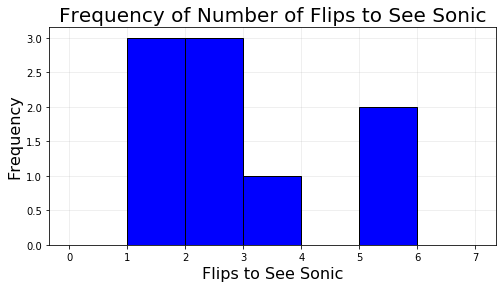

In [2]:
file_path = 'flipadelphia.csv'
df = pd.read_csv(file_path)

fig, ax = plt.subplots(figsize=(8,4))
my_bins = range(0,8,1)
# Plot histogram with custom colors
mycolor = 'blue'
df.hist(column="1", ax=ax, bins=my_bins, facecolor=mycolor, edgecolor="black")

# Add a title
ax.set_title("Frequency of Number of Flips to See Sonic", fontsize=20)

# Add axis labels 
ax.set_xlabel("Flips to See Sonic", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)


The name of the distribution that was recorded is a geometric distribution. It is a geometric distribution because we are counting the number of flips required to find a Sonic.

**Part B:** Use the distribution that you identified in Part A to determine $P(X=n \mid p_S=0.5)$, the probability that Amy would observe the first Sonic flip on the $n$-th flip, assuming that the coin is fair ($p_S=0.5$), for each of the $n$ from her 10 trials in her data set. Then, combine these to find the overall *likelihood* that she would observe her entire data set, assuming that the coin was fair. That is, estimate $P(\text{data} \mid p_S=0.5)$. Be sure to note any assumptions you make about how the outcome of one trial relates to the outcomes of the others.

If it helps to have some mathematical notation, consider that Amy's data set consists of the results of all 10 of her trials: $$\text{data} = (X_1 = n_1) \cap (X_2 = n_2) \cap \ldots (X_{10} = n_{10})$$

In [5]:
#Geometric Distribution: ((1-p)^(k-1))*p
data = np.zeros(shape=(10))
for x in range(0, 10):
    geom = ((1 - 0.5) ** ((x + 1) - 1)) * 0.5
    data[x] = geom
mult = 1
for x in data:
    mult *= x
print("Calulating P(data | ps = 0.5) as p(X1 = n1) * p(X2 = n2) * ... * p(X10 = n10)")
print("Assuming that the events are independent of each other, P(data | ps = 0.5) = {}".format(mult))

[0.5        0.25       0.125      0.0625     0.03125    0.015625
 0.0078125  0.00390625 0.00195312 0.00097656]
Calulating P(data | ps = 0.5) as p(X1 = n1) * p(X2 = n2) * ... * p(X10 = n10)
Assuming that the events are independent of each other, P(data | ps = 0.5) = 2.7755575615628914e-17


I assume that the events are independent of each other because flipping the coin to find  to probability of getting Sonic on the first try is independent of flipping the coin to get Sonic on the second flip, and so on.

**Part C:** Suppose before we observed Amy's data set, we believe that each of the seven possible coin biases occur with equal probability, $P(p_S)$. This is called the _prior distribution_ for the coin bias, $p_S$, because we have not yet taken into account Amy's data set.
* Now, estimate the probability of each possible bias, given the data: $P(p_S \mid \text{data})$.  This is called the _posterior distribution_ for the coin bias, because it is our assessment of the coin's bias _after_ we have accounted for Amy's data.
* Make a line plot of the bias along x-axis versus the posterior probability of that bias along the y-axis, and be sure to label your axes. 
* Comment on your plot. What appears to be the most probable value for the bias, $p_S$? This is called the _maximum a posteriori_ estimate, because it maximizes the posterior distribution and sounds very, *very* fancy.

Text(0.5, 1.0, 'Coin Bias vs Posterior Probability')

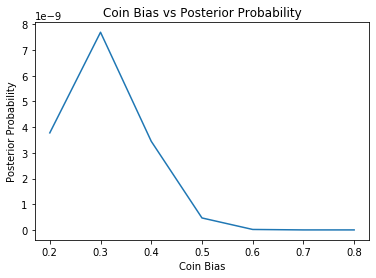

In [18]:
#P(ps|data) = 
#ps = (.2, .3, .4, .5, .6, .7, .8)
row_list =[] 
for index, rows in df.iterrows():  
    row_list.append(rows["1"])

def dataPS(prob):
    list_of_probs = []
    temp_arr = []
    mult = 1
    for x in row_list:
        geom = ((1 - prob) ** ((x + 1) - 1)) * prob
        mult *= geom
    return mult

ps = [.2, .3, .4, .5, .6, .7, .8]
list_of_probs = []
for x in ps:
    list_of_probs.append(dataPS(x))

plt.plot(ps, list_of_probs)
plt.xlabel('Coin Bias')
plt.ylabel('Posterior Probability')
plt.title('Coin Bias vs Posterior Probability')

The most probable coin bias appears to be 0.3

**Part D:** Now suppose the prior probability distribution of the coins is not uniform. Namely, suppose these probabilities follow a ***triangular distribution***, centered at $p_S=0.5$:
$$P(p_S = p) = \begin{cases} mp & p \leq 0.5 \\ m(1-p) & p > 0.5 \end{cases}$$

Determine what value the constant $m$ should have in order to make $P(p_S = p)$ is a valid probability mass function. Remember, $p_S \in \{.2, .3, \ldots , .7, .8\}$ and is discrete.

$$pmf = \sum\limits_{p=0.2}^{0.5} mp + \sum\limits_{p=0.6}^{0.8} m(1 - p)$$
$$pmf = m\sum\limits_{p=0.2}^{0.5} p + m\sum\limits_{p=0.6}^{0.8} (1 - p)$$
$$pmf = m(0.2 + 0.3 + 0.4 + 0.5) + m((1 - 0.6) + (1 - 0.7) + (1 - 0.8))$$
$$pmf = m(1.4) + m(0.9)$$
$$pmf = m(1.4 + 0.9)$$
$$1 = 2.3m$$
$$pmf = 0.4348$$

**Part E:** Compare, using words, the triangular prior distribution (this part) and the uniform prior distribution (from Part C).  What does each represent in terms of our _prior_ knowledge of the coin bias?

The uniform prior distribution represents our knowledge of what the most probable bias is from our prior knowledge. The triangular prior distribution shows us what the most probable bias is given that the distribution is not uniform.

**Part F:** Modify your calculation of the posterior distribution from Part C to use the new triangular prior distribution from Part D. Make a plot of the results that includes both posterior distribution using the uniform prior (from Part C) and the posterior distribution using the triangular prior (from Part D) in the same figure panel. Be sure to label your axes and include a legend.

In [19]:
def get_ps(ps):
    if (ps <= 0.5):
        return (ps * 0.4348)
    else:
        return (0.4348 * (1 - ps))

list_of_probs_partd = []
for x in ps:
    list_of_probs_partd.append(dataPS(get_ps(x)))
print(list_of_probs_partd)

[3.84283266258989e-11, 5.049952537568405e-10, 2.1758658205575353e-09, 4.934150773777572e-09, 2.1758658205575353e-09, 5.049952537568412e-10, 3.842832662589889e-11]


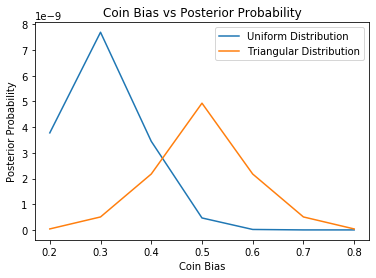

In [21]:
plt.plot(ps, list_of_probs, label='Uniform Distribution')
plt.plot(ps, list_of_probs_partd, label='Triangular Distribution')
plt.xlabel('Coin Bias')
plt.ylabel('Posterior Probability')
plt.title('Coin Bias vs Posterior Probability')
plt.legend(loc='upper right')